# Лабораторная работа 1. Введение в PyTorch

### Содержание
1. [Установка](#Установка)
1. [Тензоры](#Тензоры)
1. [Автоматическое дифференцирование](#Автоматическое-дифференцирование)
1. [Линейная регрессия в PyTorch](#Линейная-регрессия-в-PyTorch)
1. [Линейная классификация в PyTorch](#Линейная-классификация-в-PyTorch)

### Установка
Чтобы установить PyTorch, нужно на [официальном сайте](https://pytorch.org/get-started/locally/) сгенерировать команду для установки в зависимости от версии операционной системы и других параметров.  
Рекомендуется также установить [CUDA](https://developer.nvidia.com/cuda-zone) (Compute Unified Device Architecture) – вычислительную платформу от Nvidia для поддержки вычислений на видеокартах и [CuDNN](https://developer.nvidia.com/cudnn) (CUDA Deep Neural Network) – библиотеку на основе CUDA для поддержки глубоких нейронных сетей.  
Проверить правильность установки и узнать версии используемого ПО можно следующим образом:

In [1]:
import torch
import sys

In [2]:
# Утилита от Nvidia для вывода информации о видеокарте
!nvidia-smi

zsh:1: command not found: nvidia-smi


In [3]:
print('Python VERSION:', sys.version)
print('\npyTorch VERSION:', torch.__version__)
print('\nCUDA VERSION:')
! nvcc --version
print('\nCUDNN VERSION:', torch.backends.cudnn.version())
print('\nNumber CUDA Devices:', torch.cuda.device_count())
print('Current cuda device:', torch.cuda.current_device())
print('Cuda device name: ', torch.cuda.get_device_name(0))

Python VERSION: 3.13.3 (main, Apr  9 2025, 07:44:25) [GCC 14.2.1 20250207]

pyTorch VERSION: 2.6.0+cu124

CUDA VERSION:
zsh:1: command not found: nvcc



CUDNN VERSION: 90100

Number CUDA Devices: 0


RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

---
Проверить доступность CUDA можно также следующим образом:

In [4]:
torch.cuda.is_available()

False

### Тензоры
*Тензор* – многомерный массив данных в библиотеках глубокого обучения. Тензор может быть 0-мерным (скаляр), одномерным (вектор), двумерным (матрица) или размерностью больше двух.  
Тензоры используются для представления входов, выходов и параметров моделей.

#### Инициализация тензоров
Тензоры могут быть инициализированы несколькими способами.

1. На основе данных:

In [5]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

2. Из массивов NumPy:

In [6]:
import numpy as np
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]])

3. Заполненные случайным образом или константными значениями:

In [7]:
shape = (2,3)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f'Random Tensor: \n {rand_tensor} \n')
print(f'Ones Tensor: \n {ones_tensor} \n')
print(f'Zeros Tensor: \n {zeros_tensor}')

Random Tensor: 
 tensor([[0.9750, 0.3266, 0.5923],
        [0.7100, 0.7280, 0.3054]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


#### Атрибуты тензоров
Тензоры имеют несколько атрибутов, в том числе:

In [8]:
tensor = torch.rand(3, 4)
print(f'Shape of tensor: {tensor.shape}')
print(f'Datatype of tensor: {tensor.dtype}')
print(f'Device tensor is stored on the following device: {tensor.device}')

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on the following device: cpu


#### Операции над тензорами
По умолчанию тензоры создаются на CPU.  
Чтобы переместить их на GPU нужно вызвать метод `to`:

In [9]:
print(f'Tensor is stored on: {tensor.device}')
if torch.cuda.is_available():
    tensor = tensor.to('cuda')
print(f'Tensor is stored on: {tensor.device}')

Tensor is stored on: cpu
Tensor is stored on: cpu


---
Индексирование и срезы (slicing):

In [10]:
tensor = torch.tensor([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
print(f'Initial tensor:\n{tensor}\n')
print(f'First row: {tensor[0]}\n')
print(f'Second row: {tensor[1]}\n')
print(f'Last row: {tensor[-1]}\n')
print(f'First column: {tensor[:, 0]}\n')
print(f'Second column: {tensor[:, 1]}\n')
print(f'Next-to-last column: {tensor[:, -2]}\n')
print(f'Last column: {tensor[..., -1]}\n')
tensor[:,1] = 0
print(tensor)

Initial tensor:
tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])

First row: tensor([1, 2, 3, 4])

Second row: tensor([5, 6, 7, 8])

Last row: tensor([ 9, 10, 11, 12])

First column: tensor([1, 5, 9])

Second column: tensor([ 2,  6, 10])

Next-to-last column: tensor([ 3,  7, 11])

Last column: tensor([ 4,  8, 12])

tensor([[ 1,  0,  3,  4],
        [ 5,  0,  7,  8],
        [ 9,  0, 11, 12]])


---
Конкатенация:

In [11]:
concat_tensor = torch.cat([tensor, tensor, tensor], dim=1)
print(concat_tensor)

tensor([[ 1,  0,  3,  4,  1,  0,  3,  4,  1,  0,  3,  4],
        [ 5,  0,  7,  8,  5,  0,  7,  8,  5,  0,  7,  8],
        [ 9,  0, 11, 12,  9,  0, 11, 12,  9,  0, 11, 12]])


---
Арифметические операции:

In [12]:
shape = (3, 3)
tensor1 = torch.ones(shape)
tensor2 = torch.ones(shape)
tensor_sum = tensor1 + tensor2
print(f'tensor1 + tensor2 = \n{tensor_sum}\n')
tensor_mul1 = tensor1 @ tensor2
print(f'tensor1 @ tensor2 = \n{tensor_mul1}\n')
tensor_mul2 = torch.matmul(tensor1, tensor2)
print(f'torch.matmul(tensor1, tensor2) = \n{tensor_mul2}\n')
tensor_mul3 = tensor1 * tensor2
print(f'tensor1 * tensor2 = \n{tensor_mul3}\n')

tensor1 + tensor2 = 
tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])

tensor1 @ tensor2 = 
tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]])

torch.matmul(tensor1, tensor2) = 
tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]])

tensor1 * tensor2 = 
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])



---
Тензор может состоять из одного элемента (скаляр). В этом случае для доступа к значению тензора можно воспользоваться методом `item`:

In [13]:
summa = tensor.sum()
print(f'summa = {summa}, type(summa): {type(summa)}\n')
print(f'summa.item() = {summa.item()}, type(summa.item()): {type(summa.item())}')

summa = 60, type(summa): <class 'torch.Tensor'>

summa.item() = 60, type(summa.item()): <class 'int'>


---
Операции `in-place` – это операции, результат которых сохраняется в самом операнде. Обозначаются суфиксом `_`:

In [14]:
print(f'{tensor}\n')
tensor.add_(5)
print(tensor)

tensor([[ 1,  0,  3,  4],
        [ 5,  0,  7,  8],
        [ 9,  0, 11, 12]])

tensor([[ 6,  5,  8,  9],
        [10,  5, 12, 13],
        [14,  5, 16, 17]])


### Автоматическое дифференцирование

Для настройки весов в нейронных сетях используется *алгоритм обратного распространения ошибки* (back propagation). В этом алгоритме веса изменяются в зависимости от градиента функции ошибки.  
В PyTorch модуль `torch.autograd` отвечает за автоматическое дифференцирование на вычислительном графе.  

Рассмотрим сигмоидальную функцию и её производную:
$$\sigma(u)=\frac{1}{1+e^{-u}}$$
  
$$\sigma'(u)=\frac{e^{-u}}{(1+e^{-u})^2}=\frac{1}{(1+e^{-u})}\frac{e^{-u}}{(1+e^{-u})}=\frac{1}{(1+e^{-u})}\frac{(1+e^{-u})-1}{(1+e^{-u})}=\sigma(u)(1-\sigma(u))$$

Зададим эти функции в PyTorch и нарисуем их графики:

In [15]:
def sigmoid(u):
    return 1 / (1 + torch.exp(-u))

In [16]:
def sigmoid_deriv(u):
    return sigmoid(u) * (1 - sigmoid(u))

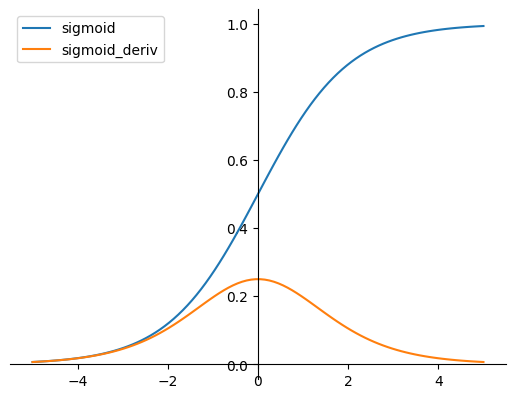

In [17]:
import matplotlib.pyplot as plt
x = torch.tensor(np.linspace(-5, 5, 100))
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.plot(x, sigmoid(x), label='sigmoid')
plt.plot(x, sigmoid_deriv(x), label='sigmoid_deriv')
ax.legend()
plt.show()

Зададим тензор, для которого мы хотели бы найти градиент (параметр `requires_grad=True`):

In [18]:
u = torch.tensor(0.0, requires_grad=True)
u

tensor(0., requires_grad=True)

Зададим тензор, которому присвоим значение функции 

In [19]:
s = sigmoid(u)
s

tensor(0.5000, grad_fn=<MulBackward0>)

В атрибуте `grad_fn` хранится ссылка на функцию, которая была использована для вычисления тензора.  
В случае задания тензора пользователем – `grad_fn = None`:

In [20]:
print(f'u.grad_fn: {u.grad_fn}\n')
print(f's.grad_fn: {s.grad_fn}\n')
a = u + u
print(f'(u+u).grad_fn: {a.grad_fn}\n')
a = u - u
print(f'(u-u).grad_fn: {a.grad_fn}\n')
a = u * u
print(f'(u*u).grad_fn: {a.grad_fn}\n')
a = u / u
print(f'(u/u).grad_fn: {a.grad_fn}\n')
a = 1 / u
print(f'(1/u).grad_fn: {a.grad_fn}\n')
a = torch.mean(u)
print(f'mean(u).grad_fn: {a.grad_fn}')

u.grad_fn: None

s.grad_fn: <MulBackward0 object at 0x7387d1117940>

(u+u).grad_fn: <AddBackward0 object at 0x7387d011c8e0>

(u-u).grad_fn: <SubBackward0 object at 0x7387ca9867a0>

(u*u).grad_fn: <MulBackward0 object at 0x7387ca9867a0>

(u/u).grad_fn: <DivBackward0 object at 0x7387ca9867a0>

(1/u).grad_fn: <MulBackward0 object at 0x7387ca9867a0>

mean(u).grad_fn: <MeanBackward0 object at 0x7387ca9867a0>


---
Для вычисления градиента необходимо вызвать метод `backward`:

In [21]:
s.backward()

Значение градиента после вызова `backward` хранится в атрибуте `grad`:

In [22]:
u.grad

tensor(0.2500)

Проверим, что значение градиента (производной) совпадает со значением, вычисленным аналитически:

In [23]:
sigmoid_deriv(u)

tensor(0.2500, grad_fn=<MulBackward0>)

Обратите внимание, что повторный вызов метода `backward` невозможен:

In [24]:
# Раскомментируйте эту строку
# s.backward()

Для того, чтобы повторно вызывать метод `backward`, следует указать при его вызове параметр `retain_graph=True`. Но имейте в виду, что в этом случае значение градиента будет накапливаться:

In [25]:
a = torch.tensor(1.0, requires_grad=True)
b = a * a
b.backward(retain_graph=True)
print(f'a.grad = {a.grad}')
b.backward(retain_graph=True)
print(f'a.grad = {a.grad}')
b.backward()
print(f'a.grad = {a.grad}')

a.grad = 2.0
a.grad = 4.0
a.grad = 6.0


При необходимости градиенты можно обнулить:

In [26]:
u.grad.data.zero_()
u.grad

tensor(0.)

#### Задание 1

**1.1** Проверьте значения производной сигмоидальной функции, вычисленные в разных точках. Сравните их со значениями на графике функций.

*Примечание:*
Отметим, что в PyTorch, конечно, имеется [своя реализация](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html) сигмоидальной функции.

Значения сигмоиды и её производной в тестовых точках:
x = -5: сигмоида = 0.006693, производная = 0.006648
x = -2: сигмоида = 0.119203, производная = 0.104994
x = -1: сигмоида = 0.268941, производная = 0.196612
x =  0: сигмоида = 0.500000, производная = 0.250000
x =  1: сигмоида = 0.731059, производная = 0.196612
x =  2: сигмоида = 0.880797, производная = 0.104994
x =  5: сигмоида = 0.993307, производная = 0.006648


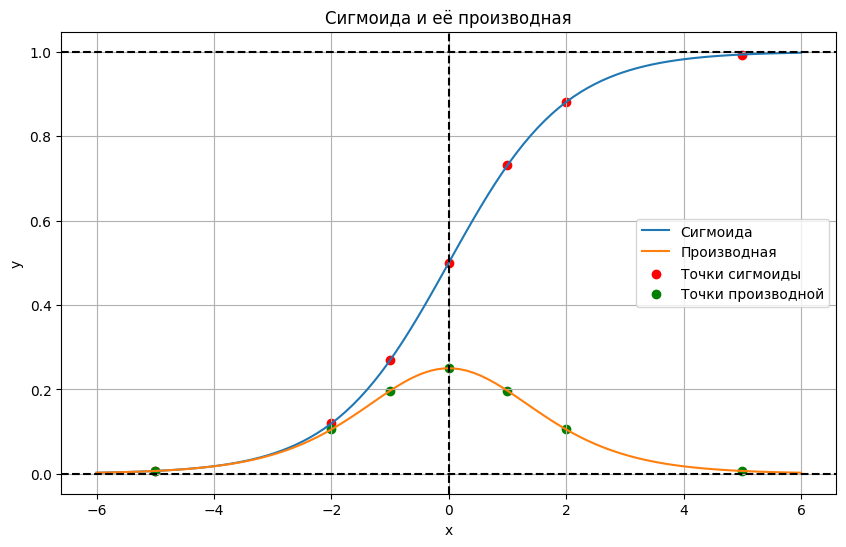

In [27]:
test_points = torch.tensor([-5, -2, -1, 0, 1, 2, 5])

# Вычисляем значения функции и производной в тестовых точках
print("Значения сигмоиды и её производной в тестовых точках:")
for x in test_points:
    s = sigmoid(x)
    ds = sigmoid_deriv(x)
    print(f"x = {x:2d}: сигмоида = {s:.6f}, производная = {ds:.6f}")

# Строим графики
x = torch.tensor(np.linspace(-6, 6, 100))
y_sigmoid = sigmoid(x)
y_deriv = sigmoid_deriv(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y_sigmoid, label='Сигмоида')
plt.plot(x, y_deriv, label='Производная')
plt.scatter(test_points, [sigmoid(p) for p in test_points], color='red', label='Точки сигмоиды')
plt.scatter(test_points, [sigmoid_deriv(p) for p in test_points], color='green', label='Точки производной')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=1, color='black', linestyle='--')
plt.axvline(x=0, color='black', linestyle='--')
plt.grid(True)
plt.legend()
plt.title('Сигмоида и её производная')
plt.xlabel('x')
plt.ylabel('y')
plt.show() 

**1.2**. Посчитайте значения градиента при помощи сигмоидальной функции из PyTorch.

*Замечание*. Мы можем найти градиенты только для листьев в графе вычислений.

Значения сигмоиды: tensor([0.0067, 0.1192, 0.2689, 0.5000, 0.7311, 0.8808, 0.9933],
       grad_fn=<SigmoidBackward0>)
Градиенты: tensor([0.0066, 0.1050, 0.1966, 0.2500, 0.1966, 0.1050, 0.0066])


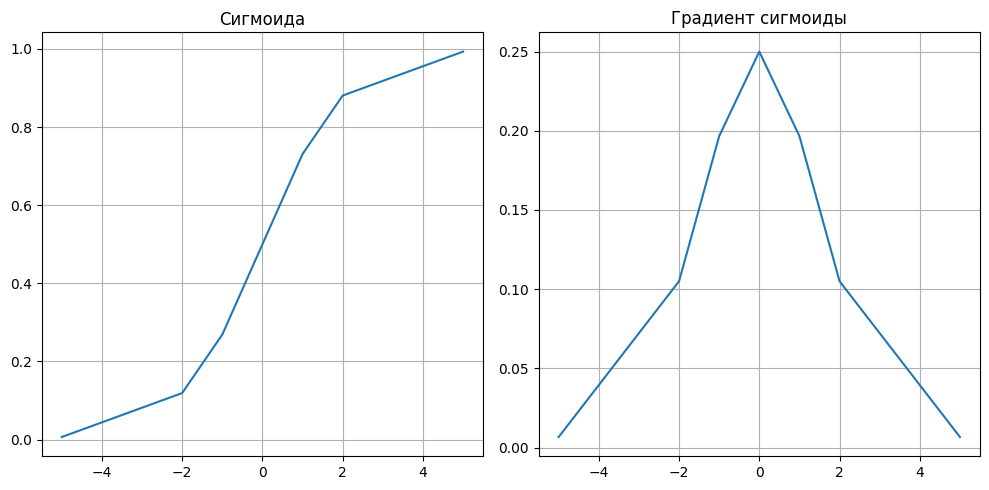

In [28]:
# Создаем тензор и включаем отслеживание градиентов
test_points = torch.tensor([-5, -2, -1, 0, 1, 2, 5], dtype=torch.float32, requires_grad=True)

# Применяем сигмоидальную функцию
sigmoid_output = torch.sigmoid(test_points)

# Вычисляем градиенты
sigmoid_output.backward(torch.ones_like(sigmoid_output))

# Получаем значения градиентов
gradients = test_points.grad

print("Значения сигмоиды:", sigmoid_output)
print("Градиенты:", gradients)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(test_points.detach().numpy(), sigmoid_output.detach().numpy())
plt.title('Сигмоида')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(test_points.detach().numpy(), gradients.detach().numpy())
plt.title('Градиент сигмоиды')
plt.grid(True)

plt.tight_layout()
plt.show()

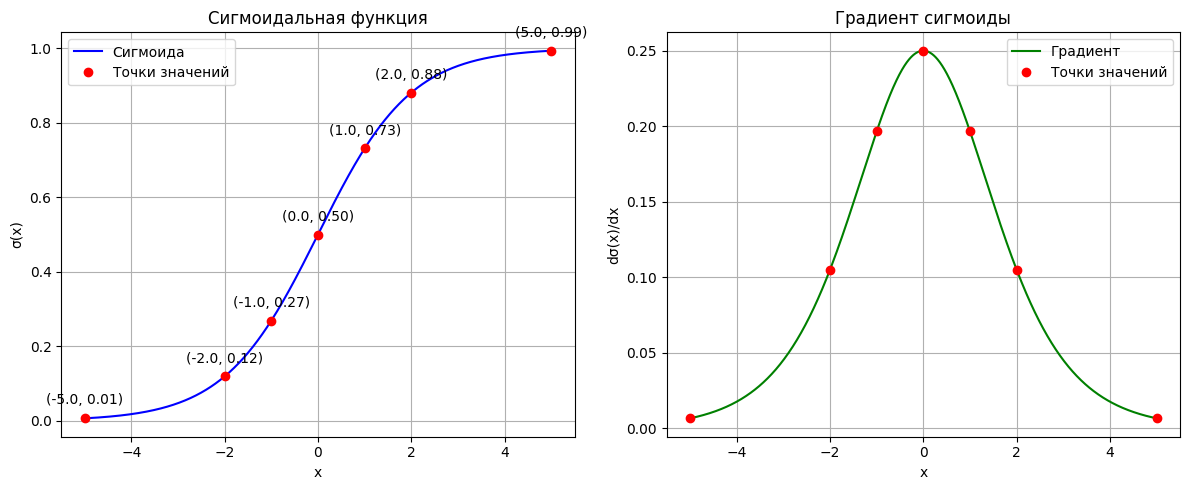

Значения сигмоиды: tensor([0.0067, 0.1192, 0.2689, 0.5000, 0.7311, 0.8808, 0.9933],
       grad_fn=<SigmoidBackward0>)
Градиенты: tensor([0.0066, 0.1050, 0.1966, 0.2500, 0.1966, 0.1050, 0.0066])


In [29]:
import torch.nn as nn

# Создаем больше точек для гладкого графика
x_smooth = torch.linspace(-5, 5, 1000, requires_grad=True)

# Создаем слой сигмоиды
sigmoid_layer = nn.Sigmoid()

# Применяем сигмоиду к исходным точкам
test_points.grad.data.zero_()
sigmoid_output = sigmoid_layer(test_points)
sigmoid_output.backward(torch.ones_like(sigmoid_output))
gradients = test_points.grad

# Применяем сигмоиду к гладким точкам
smooth_output = sigmoid_layer(x_smooth)
smooth_output.backward(torch.ones_like(smooth_output))
smooth_gradients = x_smooth.grad

# Создаем график
plt.figure(figsize=(12, 5))

# График сигмоиды
plt.subplot(1, 2, 1)
plt.plot(x_smooth.detach().numpy(), smooth_output.detach().numpy(), 'b-', label='Сигмоида')
plt.plot(test_points.detach().numpy(), sigmoid_output.detach().numpy(), 'ro', label='Точки значений')
plt.title('Сигмоидальная функция')
plt.grid(True)
plt.legend()
plt.xlabel('x')
plt.ylabel('σ(x)')

# Добавляем подписи к точкам
for i, (x, y) in enumerate(zip(test_points.detach().numpy(), sigmoid_output.detach().numpy())):
    plt.annotate(f'({x:.1f}, {y:.2f})', 
                (x, y),
                textcoords="offset points",
                xytext=(0,10),
                ha='center')

# График градиента
plt.subplot(1, 2, 2)
plt.plot(x_smooth.detach().numpy(), smooth_gradients.detach().numpy(), 'g-', label='Градиент')
plt.plot(test_points.detach().numpy(), gradients.detach().numpy(), 'ro', label='Точки значений')
plt.title('Градиент сигмоиды')
plt.grid(True)
plt.legend()
plt.xlabel('x')
plt.ylabel('dσ(x)/dx')



plt.tight_layout()
plt.show()

print("Значения сигмоиды:", sigmoid_output)
print("Градиенты:", gradients)

#### Приостановка отслеживания градиентов
По умолчанию, PyTorch отслеживает историю вычислений и поддерживает вычисление градиентов для тензоров, у которых установлено `requires_grad=True`.  
Однако иногда бывает необходимо приостановить отслеживание, например, когда сеть уже обучена и требуется выполнять только прямой проход или когда в процессе обучения сети нужно зафиксировать веса определенных слоев. В этом случае можно воспользоваться блоком `no_grad` или методом `detach()`:

In [30]:
s = sigmoid(u)
print(f's.requires_grad = {s.requires_grad}')

with torch.no_grad():
    s = sigmoid(u)
print(f's.requires_grad = {s.requires_grad}')

s.requires_grad = True
s.requires_grad = False


In [31]:
s = sigmoid(u)
print(f's.requires_grad = {s.requires_grad}')

s = s.detach()
print(f's.requires_grad = {s.requires_grad}')

s.requires_grad = True
s.requires_grad = False


### Линейная регрессия в PyTorch

#### Создание модели
Построим однослойную сеть, состоящую из одного нейрона, которая аналогична обычной линейной регрессии.

Пространство имен `nn` в PyTorch предоставляет все необходимые блоки для построения нейронных сетей.  
Каждый модуль наследует классу [nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html). Нейронная сеть представляет собой также модуль, который содержит другие модули (слои).

In [32]:
from torch import nn

Определим устройство, на котором будем обучать сеть:

In [33]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using "{}" device'.format(device))

Using "cpu" device


Опишем класс нашей нейронной сети (который должен являться наследником `nn.Module`):

In [34]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.regr = nn.Linear(1, 1)

    def forward(self, x):
        y = self.regr(x)
        return y

Метод `__init__` является конструктором класса.  
В первой строке конструктора вызывается конструктор базового класса `nn.Module`.  
Во второй строке создается единственный слой, содержащий один нейрон, с помощью модуля [Linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html).  
Данный модуль осуществляет линейное преобразование входа $\vec{x}$ в выход $\vec{y}$ с учетом матрицы весов $W$:  

$$\vec{y}=\vec{x}W^T+\vec{b}.$$

Первый аргумент для `Linear` – `in_features` – количество входов $x$, второй `out_features` – количество выходов $y$ (фактически, количество нейронов в данном слое). Существует также третий аргумент – `bias`, определяющий наличие вектора свободных коэффициентов $\vec{b}$ (по умолчанию `bias=True`).  
Матрица весов $W$ будет иметь размерность (`out_features`, `in_features`), вектор свободных коэффициентов $\vec{b}$ – (`out_features`).  
Значения $W$ и $\vec{b}$ инициализируются случайным образом из равномерного распределения $U(-\sqrt{k},\sqrt{k})$, где $k=\frac{1}{in\_features}$.

Заметим, что атрибут `requires_grad` для тензоров-весов сети автоматически устанавливается в `True`.

Метод `forward` определяет поток данных через нашу сеть (*прямой проход*). Аргумент `x` – это входные данные для сети. В нашем примере к `x` применяется линейное преобразование, результат которого является выходом сети (линейная регрессия).

---
Инициализируем генератор случайных чисел PyTorch для воспроизводимости результатов (для одинаковых начальных значений весов):

In [35]:
torch.manual_seed(42)

Создаем экземпляр класса `NeuralNetwork` и выводим структуру сети:

In [36]:
model = NeuralNetwork()
model

NeuralNetwork(
  (regr): Linear(in_features=1, out_features=1, bias=True)
)

---
Перемещаем сеть на GPU:

In [37]:
model.to(device)

NeuralNetwork(
  (regr): Linear(in_features=1, out_features=1, bias=True)
)

---
Вывод значений весов:

In [38]:
def print_weights(model):
    
    for parameter in model.named_parameters():
        print(f'{parameter[0]} = {parameter[1].data}')

In [39]:
print_weights(model)

regr.weight = tensor([[0.7645]])
regr.bias = tensor([0.8300])


#### Генерация набора данных

Инициализируем генератор случайных чисел `numpy` для воспроизводимости результатов:

In [40]:
np.random.seed(42)

Генерируем случайные данные:  
- $X$ – из равномерного распределения от 1 до 10,
- $y=2x+1$ с учетом нормально распределенного шума.

In [41]:
n_samples = 100
data = np.random.uniform(1, 10, (n_samples, 1)).astype(np.float32)
targets = 2 * data + 1 + np.random.normal(0, 2, (n_samples, 1)).astype(np.float32)

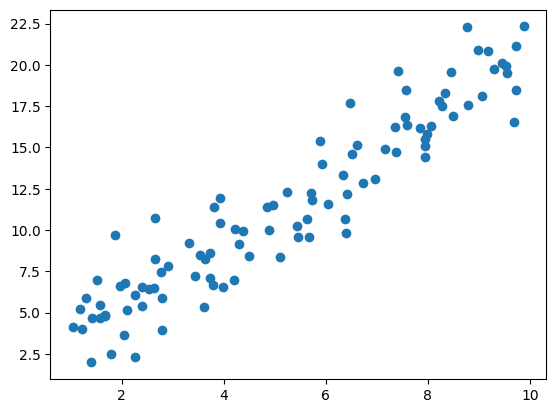

In [42]:
plt.scatter(data, targets)
plt.show()

Создаем тензоры PyTorch:

In [43]:
data = torch.from_numpy(data)
targets = torch.from_numpy(targets)

Перемещаем тензоры на GPU:

In [44]:
data = data.to(device)
targets = targets.to(device)

Нарисуем предсказание модели со случайно инициализированными весами:

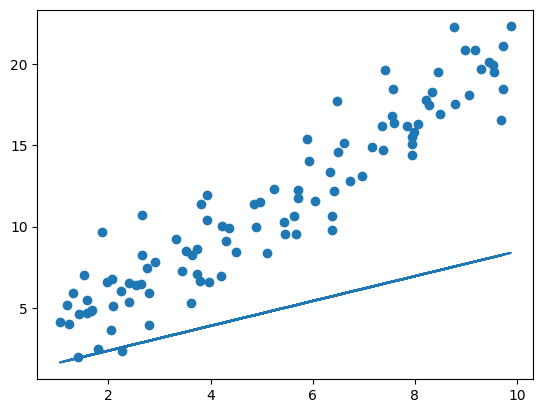

In [45]:
predictions = model(data)
plt.scatter(data.cpu().numpy(), targets.cpu().numpy())
plt.plot(data.cpu().detach().numpy(), predictions.cpu().detach().numpy())
plt.show()

#### Обучение сети
Сначала задаем функцию потерь ([MSE](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html)):

In [46]:
loss_fn = nn.MSELoss()

Затем определим оптимизатор:

In [47]:
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

Зададим функцию, определяющую действия в процессе одной эпохи обучения:

In [48]:
def train_loop(data, targets, model, loss_fn, optimizer):
    
    # Устанавливаем для модели режим обучения: эквивалентно model.training = True
    # Действует только на модули Dropout, BatchNorm, InstanceNorm (https://stackoverflow.com/questions/66534762/which-pytorch-modules-are-affected-by-model-eval-and-model-train)
    model.train()
    
    for i in range(len(data)):
        # Вычисляем предсказание модели на одном объекте
        pred = model(data[i])
        
        # Вычисляем функцию потерь
        loss = loss_fn(pred, targets[i])

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if i % 10 == 0:
            print(f'loss: {loss}')

Запускаем цикл обучения:

In [49]:
epochs = 10
print_weights(model)
for t in range(epochs):
    print(f'-------------------------------\nEpoch {t+1}')
    train_loop(data, targets, model, loss_fn, optimizer)
    print()
    print_weights(model)

regr.weight = tensor([[0.7645]])
regr.bias = tensor([0.8300])
-------------------------------
Epoch 1
loss: 32.994876861572266
loss: 3.7130351066589355
loss: 7.4773125648498535
loss: 16.94472312927246
loss: 0.06362053751945496
loss: 20.94452667236328
loss: 11.095436096191406
loss: 22.48904800415039
loss: 25.47216033935547
loss: 0.9354173541069031

regr.weight = tensor([[2.0708]])
regr.bias = tensor([1.1238])
-------------------------------
Epoch 2
loss: 0.06721831113100052
loss: 3.390458583831787
loss: 7.715185165405273
loss: 17.09217071533203
loss: 0.09646038711071014
loss: 20.185867309570312
loss: 11.15341567993164
loss: 22.767791748046875
loss: 26.13392448425293
loss: 0.8385037779808044

regr.weight = tensor([[2.0542]])
regr.bias = tensor([1.1944])
-------------------------------
Epoch 3
loss: 0.06614411622285843
loss: 3.180938482284546
loss: 7.878329277038574
loss: 17.192289352416992
loss: 0.12254366278648376
loss: 19.68047332763672
loss: 11.192747116088867
loss: 22.957412719726562

---
Нарисуем получившуюся модель:

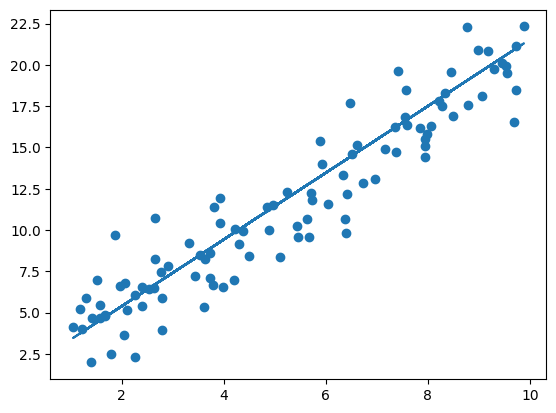

In [50]:
# Возвращаем модель в режим инференса:  эквивалентно model.training = False
model.eval()

predictions = model(data)
plt.scatter(data.cpu().numpy(), targets.cpu().numpy())
plt.plot(data.cpu().detach().numpy(), predictions.cpu().detach().numpy())

#### Задание 2

**2.1**. Вычислите MSE для итоговой модели.

Среднеквадратичная ошибка (MSE): 3.5339624881744385


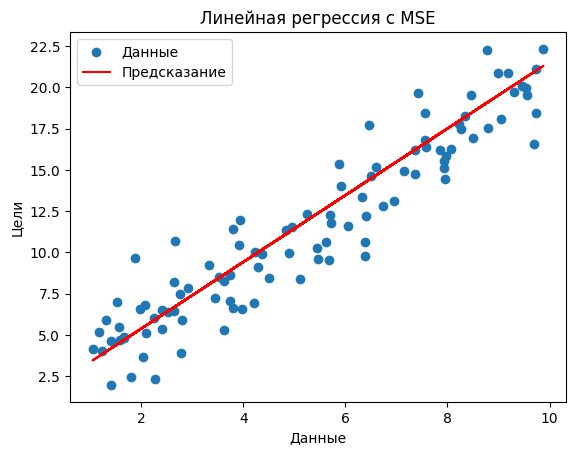

In [51]:
# Функция для вычисления среднеквадратичной ошибки (MSE)
def calculate_mse(model, data, targets, loss_fn, device):
    model.eval()  # Переводим модель в режим оценки
    with torch.no_grad():  # Отключаем вычисление градиентов
        predictions = model(data)  # Получаем предсказания модели
        mse = loss_fn(predictions, targets)  # Вычисляем MSE
    return mse.item()  # Возвращаем значение MSE

# Вычисляем MSE для итоговой модели
mse = calculate_mse(model, data, targets, loss_fn, device)
print(f'Среднеквадратичная ошибка (MSE): {mse}')

# Визуализируем данные и предсказания модели
model.eval()  # Переводим модель в режим оценки
with torch.no_grad():  # Отключаем вычисление градиентов
    predicted = model(data)  # Получаем предсказания модели

plt.scatter(data.cpu().numpy(), targets.cpu().numpy(), label='Данные')  # Отображаем данные
plt.plot(data.cpu().numpy(), predicted.cpu().numpy(), 'r-', label='Предсказание')  # Отображаем предсказания
plt.xlabel('Данные')  # Подписываем ось x
plt.ylabel('Цели')  # Подписываем ось y
plt.title('Линейная регрессия с MSE')  # Заголовок графика
plt.legend()  # Отображаем легенду
plt.show()  # Отображаем график

**2.2**. Выполните перебор гиперпараметров – скорости обучения и количества эпох (не менее пяти значений на каждый гиперпараметр) и найдите комбинацию, при которой достигается минимум MSE на обучающих данных.

lr: 0.0050, epochs: 50, MSE: 3.2397
lr: 0.0050, epochs: 100, MSE: 3.3597
lr: 0.0050, epochs: 150, MSE: 3.2626
lr: 0.0050, epochs: 200, MSE: 3.6178
lr: 0.0050, epochs: 300, MSE: 3.3092
lr: 0.0050, epochs: 500, MSE: 3.2654
lr: 0.0075, epochs: 50, MSE: 3.5351
lr: 0.0075, epochs: 100, MSE: 3.3843
lr: 0.0075, epochs: 150, MSE: 3.2930
lr: 0.0075, epochs: 200, MSE: 3.3239
lr: 0.0075, epochs: 300, MSE: 3.2349
lr: 0.0075, epochs: 500, MSE: 3.2503
lr: 0.0100, epochs: 50, MSE: 3.6524
lr: 0.0100, epochs: 100, MSE: 3.6686
lr: 0.0100, epochs: 150, MSE: 3.5180
lr: 0.0100, epochs: 200, MSE: 3.2822
lr: 0.0100, epochs: 300, MSE: 3.2321
lr: 0.0100, epochs: 500, MSE: 3.2271
lr: 0.0150, epochs: 50, MSE: 3.4925
lr: 0.0150, epochs: 100, MSE: 3.3679
lr: 0.0150, epochs: 150, MSE: 3.2318
lr: 0.0150, epochs: 200, MSE: 3.2809
lr: 0.0150, epochs: 300, MSE: 3.2332
lr: 0.0150, epochs: 500, MSE: 3.2281
lr: 0.0200, epochs: 50, MSE: 3.4177
lr: 0.0200, epochs: 100, MSE: 3.2300
lr: 0.0200, epochs: 150, MSE: 3.2396
lr: 0.

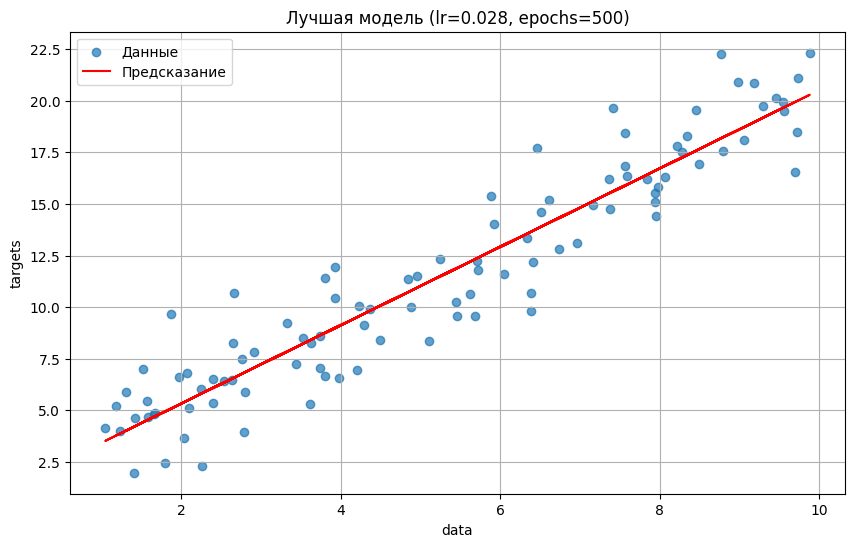

In [52]:
from itertools import product

# Гиперпараметры для перебора
learning_rates = [0.005, 0.0075, 0.01, 0.015, 0.02, 0.025, 0.028, 0.03]  # 8 значений lr
epochs_list = [50, 100, 150, 200, 300, 500]         # 6 значений epochs

best_mse = float('inf')
best_params = {}

# Перебор всех комбинаций
for lr, epochs in product(learning_rates, epochs_list):
    model = NeuralNetwork()
    criterion = nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    
    # Обучение
    for epoch in range(epochs):
        optimizer.zero_grad()
        predictions = model(data)
        loss = criterion(predictions, targets)
        loss.backward()
        optimizer.step()
    
    # Вычисление MSE на обучающих данных
    with torch.no_grad():
        mse = criterion(model(data), targets).item()
        #mse = calculate_mse(model, data, targets, loss_fn, device)
    
    # Обновление лучших параметров
    if mse < best_mse:
        best_mse = mse
        best_params = {'lr': lr, 'epochs': epochs, 'mse': mse}
    
    print(f"lr: {lr:.4f}, epochs: {epochs}, MSE: {mse:.4f}")

# Вывод результатов
print("\nЛучшие параметры:")
print(f"Скорость обучения: {best_params['lr']}")
print(f"Количество эпох: {best_params['epochs']}")
print(f"Минимальный MSE: {best_params['mse']:.4f}")

# Визуализация лучшей модели
best_model = NeuralNetwork()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(best_model.parameters(), lr=best_params['lr'])

for epoch in range(best_params['epochs']):
    optimizer.zero_grad()
    predictions = best_model(data)
    loss = criterion(predictions, targets)
    loss.backward()
    optimizer.step()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(data.numpy(), targets.numpy(), label='Данные', alpha=0.7)
plt.plot(data.numpy(), best_model(data).detach().numpy(), 'r-', label='Предсказание')
plt.title(f"Лучшая модель (lr={best_params['lr']}, epochs={best_params['epochs']})")
plt.xlabel('data')
plt.ylabel('targets')
plt.legend()
plt.grid(True)
plt.show()

### Линейная классификация в PyTorch

#### Генерация набора данных
Сгенерируем набор данных для классификации: объекты с меткой "0" будут нормально распределены вокруг точки (-1, -1),  объекты с меткой "1" – вокруг точки (1, 1):

In [53]:
n_samples = 100
half = int(n_samples / 2)
     
x_class0 = np.random.normal(size=[half, 2]) + [-1, -1]
y_class0 = np.zeros((half, 1))

x_class1 = np.random.normal(size=[half, 2]) + [1, 1]
y_class1 = np.ones((half, 1))

data = np.vstack([x_class0, x_class1])
targets = np.vstack([y_class0, y_class1])

In [54]:
data = data.astype(np.float32)
targets = targets.astype(np.float32)

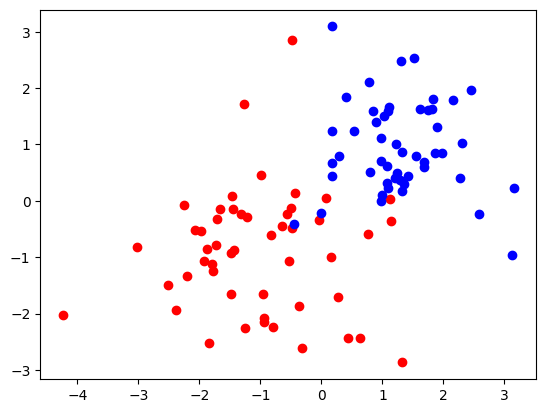

In [55]:
plt.scatter(x_class0[:, 0], x_class0[:, 1], c='red')
plt.scatter(x_class1[:, 0], x_class1[:, 1], c='blue')

#### Задание 3

**3.1** Постройте нейронную сеть – линейный классификатор, разбейте набор данных на обучающую и валидацинную подвыборки. Визуализируйте полученные подвыборки данных. Обучите модель распознавать приведенный набор данных.

*Подсказка*: в качестве функции потерь можно использовать Binary Cross Entropy ([BCELOSS](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html)).

In [56]:
from torch import nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using "{}" device'.format(device))


Using "cpu" device


In [57]:
# Линейный классификатор (однослойная нейронная сеть) для бинарной классификации с сигмоидной активацией
# Параметр: input_dim (int): размерность входных признаков
class LinearClassifier(nn.Module):
    def __init__(self, input_dim):
        super(LinearClassifier, self).__init__()
        # Полносвязный слой без активации (логиты)
        self.linear = nn.Linear(input_dim, 1)
    
    # Прямой проход: x -> линейное преобразование -> сигмоидная активация, т.к. бинарная классификация 
    def forward(self, x):
        logits = self.linear(x)  # Вычисление логитов
        return torch.sigmoid(logits)  # Применение сигмоиды для получения вероятностей

    # Обучение классификатора
    def train_model(self, X_train, y_train, X_val, y_val, lr=0.01, epochs=100, vis_epochs=[], verbose=True):
        fn_loss = nn.BCELoss()  # Функция потерь. Бинарная кросс-энтропия
        optimizer = torch.optim.SGD(self.parameters(), lr=lr)
        
        train_losses = []
        val_losses = []

        if vis_epochs == []:
            vis_epochs = [(i+1) for i in range(epochs)]
            
        for epoch in range(1, epochs+1):
            # Обучение
            self.train()
            optimizer.zero_grad()
            predictions = self(X_train)
            loss = fn_loss(predictions, y_train)
            loss.backward()
            optimizer.step()
            if epoch in vis_epochs:
                train_losses.append(loss.item())
            
            # Валидация
            self.eval()
            with torch.no_grad():
                val_predictions = self(X_val)
                val_loss = fn_loss(val_predictions, y_val)
                if epoch in vis_epochs:
                    val_losses.append(val_loss.item())
                
            # Вывод промежуточных результатов (контроль обучения)
            if verbose and (epoch) % 10 == 0:
                print(f'Epoch {epoch+1}/{epochs}, '
                      f'Train Loss: {loss.item():.4f}, '
                      f'Val Loss: {val_loss.item():.4f}')
        
        # Визуализация обучения
        plt.figure(figsize=(10, 5))
        plt.plot(vis_epochs, train_losses, label='Train Loss')
        plt.plot(vis_epochs, val_losses, label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.title('Training and Validation Loss')
        plt.show()

    # Предсказание классов
    # Аргументы: X - входные данные, threshold - порог значения вероятности для классификации
    def predict(self, X, threshold=0.5):
        with torch.no_grad():
            probabilities = self(X)
            return (probabilities > threshold).float() # Возвращает 0, если вероятность <= 0.5. Возвращает 1, если вероятность > 0.5
    
    # Оценка точности модели. Возвращает accuracy
    def evaluate(self, X, y):
        predictions = self.predict(X)
        accuracy = (predictions == y).float().mean()
        return accuracy.item()

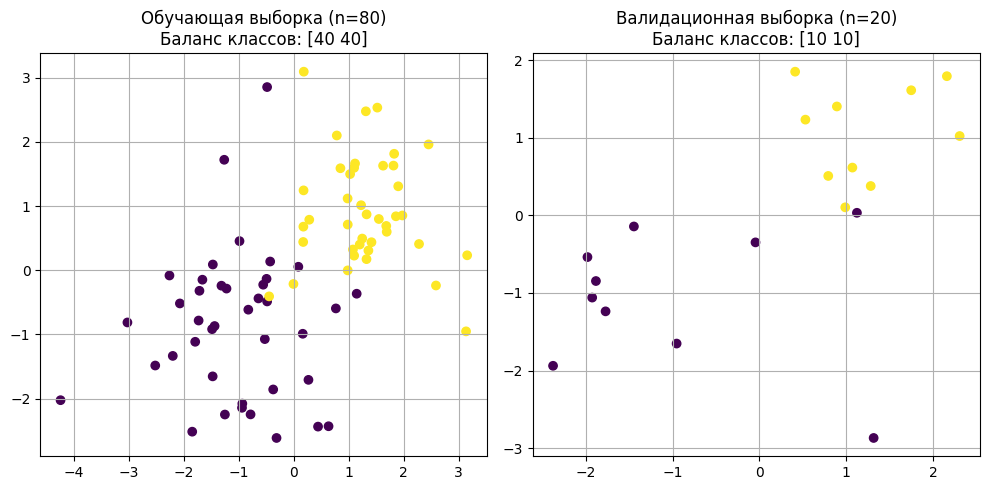

In [58]:
from sklearn.model_selection import train_test_split

# Разделение данных (80% - обучение, 20% - валидация)
X_train, X_val, y_train, y_val = train_test_split(data, targets, test_size=0.2, random_state=42, stratify=targets)  # stratify=y сохраняет баланс классов

# Визуализация обучающей и валидационной выборок
plt.figure(figsize=(10, 5))

# Обучающая выборка
plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)#, cmap='coolwarm', alpha=0.7, edgecolors='k')
plt.title(f'Oбучающая выборка (n={len(X_train)})\nБаланс классов: {np.bincount(np.ravel(y_train).astype(int))}')
#plt.xlabel('Признак 1')
#plt.ylabel('Признак 2')
plt.grid(True)

# Валидационная выборка
plt.subplot(1, 2, 2)
plt.scatter(X_val[:, 0], X_val[:, 1], c=y_val)#, cmap='coolwarm', alpha=0.7, edgecolors='k', marker='s')
plt.title(f'Валидационная выборка (n={len(X_val)})\nБаланс классов: {np.bincount(np.ravel(y_val).astype(int))}')
#plt.xlabel('Признак 1')
#plt.ylabel('Признак 2')
plt.grid(True)

plt.tight_layout()
plt.show()

X_train = torch.from_numpy(X_train)
y_train = torch.from_numpy(y_train)
X_val = torch.from_numpy(X_val)
y_val = torch.from_numpy(y_val)

Epoch 11/50, Train Loss: 0.2803, Val Loss: 0.2531
Epoch 21/50, Train Loss: 0.2508, Val Loss: 0.2273
Epoch 31/50, Train Loss: 0.2325, Val Loss: 0.2117
Epoch 41/50, Train Loss: 0.2199, Val Loss: 0.2015
Epoch 51/50, Train Loss: 0.2108, Val Loss: 0.1944


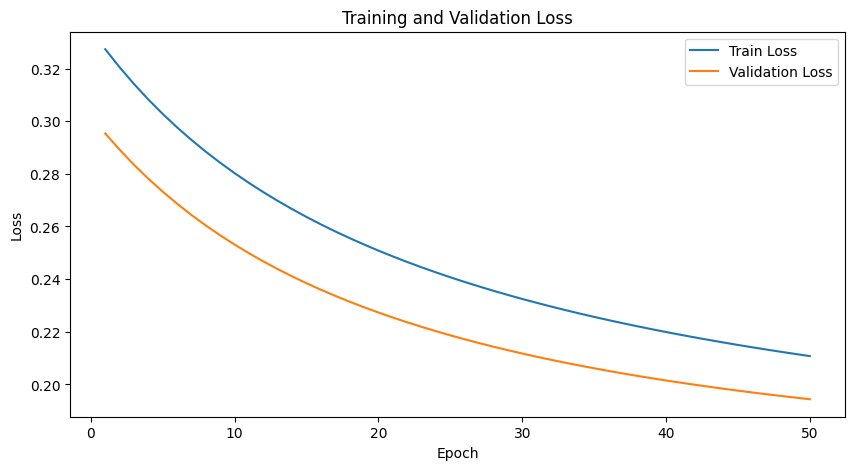

Validation Accuracy: 0.95


In [59]:
# Обучение модели
torch.manual_seed(42)
# Создание и обучение модели
model = LinearClassifier(input_dim=2)
model.train_model(X_train, y_train, X_val, y_val, lr=0.1, epochs=50)

# Оценка точности
accuracy = model.evaluate(X_val, y_val)
print(f'Validation Accuracy: {accuracy:.2f}')

**3.2** Исследуйте значение функции потерь на обучающей и валидационной подвыборках после 1, 5, 10, 50, 100, 200, 500, 1000 эпох. Визуализируйте результаты. Достигается ли переобучение после какой-либо из эпох?

Epoch 11/1000, Train Loss: 0.2803, Val Loss: 0.2531
Epoch 21/1000, Train Loss: 0.2508, Val Loss: 0.2273
Epoch 31/1000, Train Loss: 0.2325, Val Loss: 0.2117
Epoch 41/1000, Train Loss: 0.2199, Val Loss: 0.2015
Epoch 51/1000, Train Loss: 0.2108, Val Loss: 0.1944
Epoch 61/1000, Train Loss: 0.2038, Val Loss: 0.1892
Epoch 71/1000, Train Loss: 0.1983, Val Loss: 0.1853
Epoch 81/1000, Train Loss: 0.1939, Val Loss: 0.1824
Epoch 91/1000, Train Loss: 0.1902, Val Loss: 0.1800
Epoch 101/1000, Train Loss: 0.1871, Val Loss: 0.1782
Epoch 111/1000, Train Loss: 0.1845, Val Loss: 0.1768
Epoch 121/1000, Train Loss: 0.1823, Val Loss: 0.1756
Epoch 131/1000, Train Loss: 0.1803, Val Loss: 0.1746
Epoch 141/1000, Train Loss: 0.1786, Val Loss: 0.1738
Epoch 151/1000, Train Loss: 0.1771, Val Loss: 0.1732
Epoch 161/1000, Train Loss: 0.1757, Val Loss: 0.1727
Epoch 171/1000, Train Loss: 0.1745, Val Loss: 0.1722
Epoch 181/1000, Train Loss: 0.1735, Val Loss: 0.1719
Epoch 191/1000, Train Loss: 0.1725, Val Loss: 0.1716
Ep

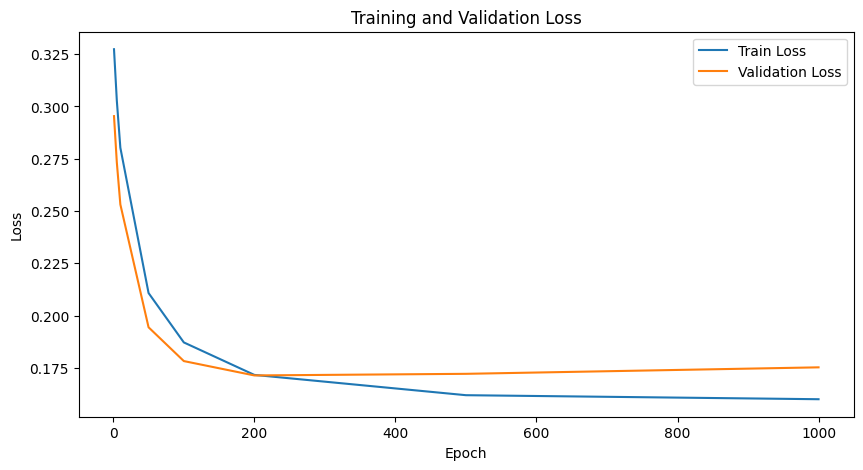

Validation Accuracy: 0.95


In [60]:
# Обучение модели
torch.manual_seed(42)
# Создание и обучение модели
model = LinearClassifier(input_dim=2)
model.train_model(X_train, y_train, X_val, y_val, lr=0.1, epochs=1000, vis_epochs = [1, 5, 10, 50, 100, 200, 500, 1000])

# Оценка точности
accuracy = model.evaluate(X_val, y_val)
print(f'Validation Accuracy: {accuracy:.2f}')

**Вывод:** При количестве эпох более 200 происходит переобучение модели

**3.3** Сгенерируйте новые наборы данных при `n_samples` равном 100, 500, 1000. Проанализируйте качество обучения при разном объёме сгнерированных данных. Постройте график `loss` (на валидационной выборке) -`n_samples`.

n_samples = 100
Validation Accuracy: 0.85
n_samples = 500
Validation Accuracy: 0.94
n_samples = 1000
Validation Accuracy: 0.94


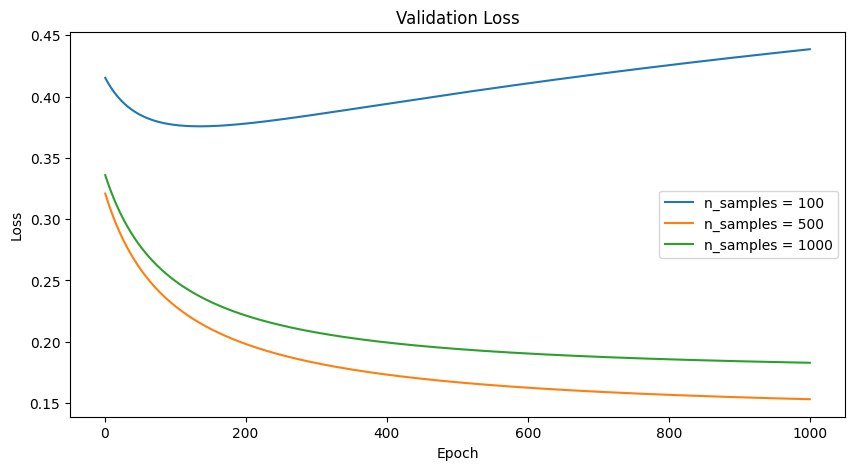

In [61]:
list_n_samples = [100, 500, 1000]
epochs = 1000
val = []

for n_samples in list_n_samples:
    print(f'n_samples = {n_samples}')
    half = int(n_samples / 2)
     
    x_class0 = np.random.normal(size=[half, 2]) + [-1, -1]
    y_class0 = np.zeros((half, 1))
    
    x_class1 = np.random.normal(size=[half, 2]) + [1, 1]
    y_class1 = np.ones((half, 1))
    
    data = np.vstack([x_class0, x_class1])
    targets = np.vstack([y_class0, y_class1])
    

    # Разделение данных (80% - обучение, 20% - валидация)
    X_train, X_val, y_train, y_val = train_test_split(data, targets, test_size=0.2, random_state=42, stratify=targets)  # stratify=y сохраняет баланс классов
    X_train = torch.from_numpy(X_train).float()
    y_train = torch.from_numpy(y_train).float()
    X_val = torch.from_numpy(X_val).float()
    y_val = torch.from_numpy(y_val).float()

    # Обучение модели
    torch.manual_seed(42)
    # Создание и обучение модели
    model = LinearClassifier(input_dim=2)
    #model.train_model(X_train, y_train, X_val, y_val, lr=0.1, epochs=1000)
    fn_loss = nn.BCELoss()  # Функция потерь. Бинарная кросс-энтропия
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    
    train_losses = []
    val_losses = []
    
    for epoch in range(1, epochs+1):
        # Обучение
        model.train()
        optimizer.zero_grad()
        predictions = model(X_train)
        loss = fn_loss(predictions, y_train)
        loss.backward()
        optimizer.step()
        #train_losses.append(loss.item())
        
        # Валидация
        model.eval()
        with torch.no_grad():
            val_predictions = model(X_val)
            val_loss = fn_loss(val_predictions, y_val)
            val_losses.append(val_loss.item())
            
        
        
        # Вывод промежуточных результатов (контроль обучения)
        #if (epoch) % 10 == 0:
        #    print(f'Epoch {epoch+1}/{epochs}, '
        #          f'Train Loss: {loss.item():.4f}, '
        #          f'Val Loss: {val_loss.item():.4f}')
    val.append(val_losses)    
    # Оценка точности
    accuracy = model.evaluate(X_val, y_val)
    print(f'Validation Accuracy: {accuracy:.2f}')

# Визуализация обучения
vis_epochs = [i for i in range(1,epochs+1)]
plt.figure(figsize=(10, 5))
plt.plot(vis_epochs, val[0], label='n_samples = 100')
plt.plot(vis_epochs, val[1], label='n_samples = 500')
plt.plot(vis_epochs, val[2], label='n_samples = 1000')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Validation Loss')
plt.show()

    

#### Задание 4 (факультативное)
Прочитать параграф 2.6 в учебнике С. Николенко и др. (стр. 81–92) и воспроизвести рассмотренные там нейронные сети на TensorFlow и Keras.

In [64]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

n_samples, batch_size, num_steps = 1000, 100, 20000
X_data = np.random.uniform(1, 10, (n_samples, 1))
y_data = 2 * X_data + 1 + np.random.normal(0, 2, (n_samples, 1))
X = tf.placeholder(tf.float32, shape=(batch_size, 1))
y = tf.placeholder(tf.float32, shape=(batch_size, 1))

with tf.variable_scope('linear-regression'):
    k = tf.Variable(tf.random_normal((1, 1)), name='slope')
    b = tf.Variable(tf.zeros((1,)), name='bias')
y_pred = tf.matmul(X, k) + b
loss = tf.reduce_sum((y - y_pred) ** 2)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss)

display_step = 100
with tf.Session() as sess:
    sess.run(tf.initialize_global_variables())
    for i in range(num_steps):
        indices = np.random.choice(n_samples, batch_size)
        X_batch, y_batch = X_data[indices], y_data[indices]
        _, loss_val, k_val, b_val = sess.run([ optimizer, loss, k, b ], feed_dict = { X : X_batch, y : y_batch })
        if (i+1) % display_step == 0:
            print('Эпоха %d: %.8f, k=%.4f, b=%.4f' % (i+1, loss_val, k_val, b_val))

AttributeError: module 'tensorflow.compat.v1' has no attribute 'initialize_global_variables'